# Predict The Marks Grades Of Student Based On Hours Of Study

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Importing the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/faizan-code/Professional-cipher/main/Students%20result/1_student_scores%20-%20student_scores.csv")

In [3]:
print('Data is loaded')
df.head()

Data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analysing the data

In [4]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
df.isnull().tail()

,Hours,Scores
20,False,False
21,False,False
22,False,False
23,False,False
24,False,False


From the analysis we understand that there is no null values

## Visualizing the analysis

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


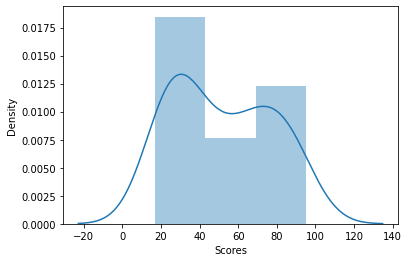

In [13]:
sns.distplot(df['Scores'])
plt.show()

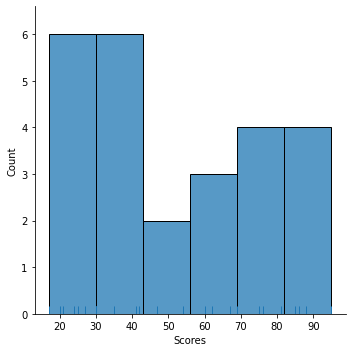

In [14]:
sns.displot(df['Scores'], kde=False, rug=True)
plt.show()

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


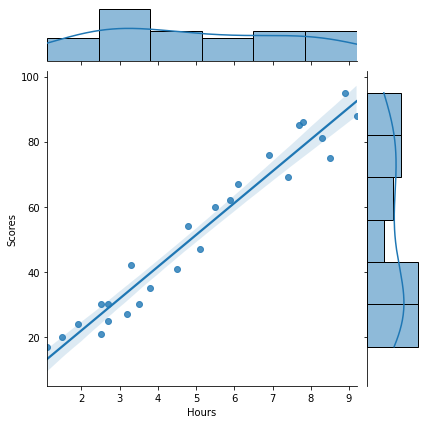

In [15]:
sns.jointplot(df['Hours'], df['Scores'], kind='reg')
plt.show()

<ipython-input-18-8fadc2fbb3a3>:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001EA070D64C0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  g.ax_joint.legend([prop], ['r={:f}, p={:f}'.format(r, p)])


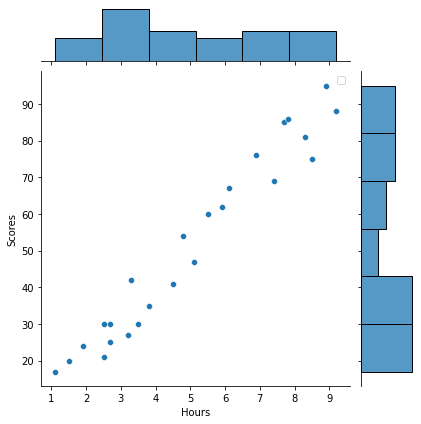

In [18]:
g = sns.jointplot(data=df, x='Hours', y='Scores')
r, p = stats.pearsonr(df['Hours'], df['Scores'])
prop = g.ax_joint.plot([], [], linestyle="", alpha=0)

g.ax_joint.legend([prop], ['r={:f}, p={:f}'.format(r, p)])

## Visualizing the correlation between hours and scors

Text(0.5, 1.0, 'Plotting the regression line')

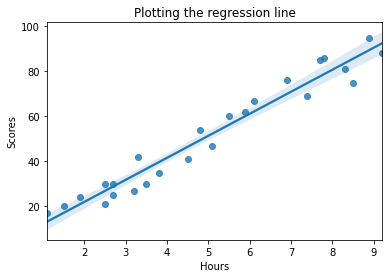

In [19]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("Plotting the regression line")

from the output, we can conclude that hours and scores are strongly correlated

## Implement Simple Linear Regression to predict data

In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = (reg.predict(x_test)).round(2)
y_pred

array([17.05, 33.69, 74.81, 26.84, 60.12, 39.57, 20.97, 78.72])

## Comparing actual vs predicted value

In [25]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,17.05
1,27,33.69
2,69,74.81
3,30,26.84
4,62,60.12
5,35,39.57
6,24,20.97
7,86,78.72


## Visualizing actual and predicted scores

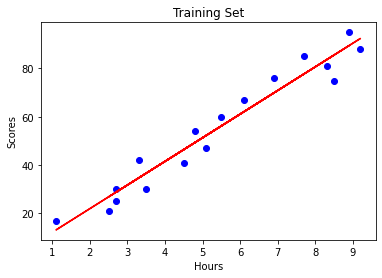

In [28]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, reg.predict(x_train), color='red')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Caluclating coefficients of SLR equation

$C_{0} + C_{1} . x$

$C_{0}$: Slope <br>
$C_{1}$: Intercept

In [29]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i] - mean_x) * (y[i] - mean_y)
    den += (x[i] - mean_x) ** 2
C1 = num/den

In [30]:
C0 = mean_y - C1 * mean_x

In [39]:
df['Predicted_Scores'] = (C0 + C1 * df['Hours']).round(2)

In [36]:
df.head()

,Hours,Scores,Predicted_Scores
0,2.5,21,26.92
1,5.1,47,52.34
2,3.2,27,33.77
3,8.5,75,85.58
4,3.5,30,36.70


[]

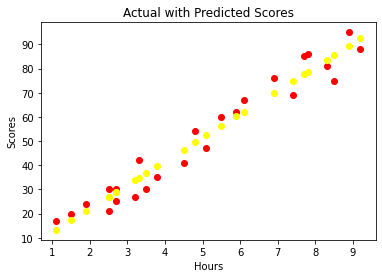

In [40]:
plt.scatter(df['Hours'], df['Scores'], c='red', label='Actual Marks')
plt.scatter(df['Hours'], df['Predicted_Scores'], c='yellow', label='Predicted Marks')
plt.title('Actual with Predicted Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [41]:
y = (C0 + C1 * 9.25).round(2)
print('Percentage of marks based on student hours study: ', y)


Percentage of marks based on student hours study:  92.91


## Categorizing students passed or failed

In [42]:
degradate = 60
df['Result'] = df['Scores'] >= 60
df

,Hours,Scores,Predicted_Scores,Result
0,2.5,21,26.92,False
1,5.1,47,52.34,False
2,3.2,27,33.77,False
3,8.5,75,85.58,True
4,3.5,30,36.70,False
5,1.5,20,17.15,False
6,9.2,88,92.42,True
7,5.5,60,56.25,True
8,8.3,81,83.62,True
9,2.7,25,28.88,False


In [44]:
df['Result'] = df['Result'].astype(str)

In [46]:
df.Result = df.Result.replace({'True': 'Passed', 'False': 'Repeat'})

In [47]:
df.head()

,Hours,Scores,Predicted_Scores,Result
0,2.5,21,26.92,Repeat
1,5.1,47,52.34,Repeat
2,3.2,27,33.77,Repeat
3,8.5,75,85.58,Passed
4,3.5,30,36.70,Repeat


In [48]:
df['Result'].value_counts()

Repeat    14
Passed    11
Name: Result, dtype: int64

In [51]:
repeat = df['Result'].value_counts().tolist()[0]
passed = df['Result'].value_counts().tolist()[1]

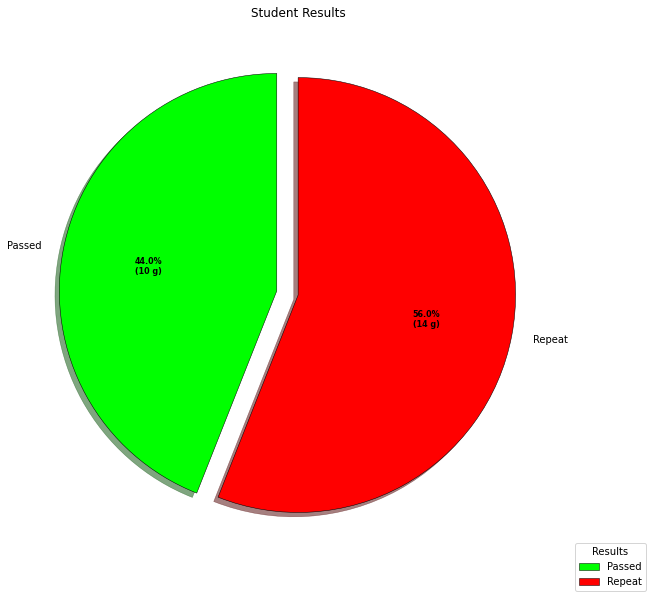

In [59]:
Results = ['Passed', 'Repeat']
data = [passed, repeat]
explode = (0.1, 0.0)
colors = ('lime', 'red')

wp = {'linewidth':0.5, 'edgecolor':'black'}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(15, 10))
wedges, texts, autotexts = ax.pie(data,
                                    autopct = lambda pct: func(pct, data),
                                    explode=explode,
                                    labels = Results,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    wedgeprops = wp,
                                    textprops = dict(color='black'))

# Adding Legend
ax.legend(wedges, Results,
        title='Results',
        loc="center left",
        bbox_to_anchor = (1, 0))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Student Results')

# Show plots
plt.show()

## Conclusion

The student marks prediction based on hours time studied from student already complete with accuracy 92.91. From the dataset we can conclude that only 44% passed test and the rest must repeat